__<h1 style="text-align: center;font-size: 3rem">Exploratory Data Analysis II</h1>__<h2 style="text-align: center;font-size: 2rem\">Data Visualization</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

import itertools
import os

In [2]:
load_dotenv()
RANDOM_STATE = int(os.getenv("RANDOM_STATE", 0))

print(f"{RANDOM_STATE=}")

RANDOM_STATE=4813


In [3]:
plt.style.use("dark_background")


In [4]:
transactions: pd.DataFrame = pd.read_csv(r"../data/raw/creditcard.csv")

In [ ]:
grouped_transactions = transactions.groupby("Class", group_keys=False)
sampled_transactions = grouped_transactions.sample(frac=0.15, random_state=RANDOM_STATE)
sampled_transactions

Time        V1        V2        V3        V4        V5        V6  \
127151   78226.0  0.565345 -1.703029 -0.007896 -0.025183 -0.554761  1.499709   
96571    65829.0  1.099787 -0.129350  0.631598  0.738438 -0.402518  0.225753   
193531  130173.0  2.038722 -0.179165 -1.102199  0.427829 -0.239450 -1.158529   
22075    32019.0  1.156122 -0.102953 -0.313474 -0.167652  0.073281 -0.488672   
22373    32211.0 -0.373087  1.076499  0.633856  0.975012 -0.198271 -0.332602   
...          ...       ...       ...       ...       ...       ...       ...   
248296  153875.0 -0.613696  3.698772 -5.534941  5.620486  1.649263 -2.335145   
238222  149582.0 -4.280584  1.421100 -3.908229  2.942946 -0.076205 -2.002526   
68320    52934.0  1.036639  0.407227  0.757706  3.161821 -0.568122  0.202181   
251904  155554.0 -1.040067  3.106703 -5.409027  3.109903 -0.887237 -2.497522   
18809    29785.0  0.923764  0.344048 -2.880004  1.721680 -3.019565 -0.639736   

              V7        V8        V9  ...       V21       V22       V23  \
127151 -0.475361  0.420457  1.182229  ... -0.067032 -0.778454 -0.413855   
96571  -0.283567  0.163926  0.306405  ... -0.013107  0.183749 -0.074404   
193531  0.088295 -0.234594  0.742806  ... -0.294543 -0.789361  0.356820   
22075   0.334974 -0.162191 -0.339661  ... -0.391899 -1.382638  0.016309   
22373   0.382000  0.399568 -0.684020  ...  0.218741  0.516339  0.054718   
...          ...       ...       ...  ...       ...       ...       ...   
248296 -0.907188  0.706362 -3.747646  ...  0.319261 -0.471379 -0.075890   
238222 -2.874155 -0.856005  0.963674  ... -0.140062 -0.907720 -0.680108   
68320  -0.689804  0.411380  0.336769  ... -0.050108  0.123761 -0.132568   
251904 -2.073347  0.639818 -3.013331  ...  0.773961  0.214868 -0.184233   
18809  -3.801325  1.299096  0.864065  ...  0.899931  1.481271  0.725266   

             V24       V25       V26       V27       V28  Amount  Class  
127151 -1.635170  0.098244  1.027598 -0.096977  0.042362  361.02      0  
96571   0.087631  0.455126  0.420224 -0.001726  0.002770   25.63      0  
193531 -0.049679 -0.361563  0.204811 -0.077694 -0.062148    8.90      0  
22075  -0.474224  0.163155  0.646327 -0.118927  0.000341   89.99      0  
22373   0.074854 -0.200041 -0.298610 -0.040208 -0.019622   42.78      0  
...          ...       ...       ...       ...       ...     ...    ...  
248296 -0.667909 -0.642848  0.070600  0.488410  0.292345    0.00      1  
238222 -0.349170  0.056276 -1.149923 -1.809886  0.723051    1.10      1  
68320   0.350231  0.507701  0.189621  0.061016  0.063141    0.76      1  
251904 -0.284091  0.493467  0.732329  0.675067  0.337076   94.82      1  
18809   0.176960 -1.815638 -0.536517  0.489035 -0.049729   30.30      1  

[56961 rows x 31 columns]

In [6]:
fraudulent_prop = float(
    (sampled_transactions["Class"] == 1).sum() / sampled_transactions.shape[0]
)
print(f"{fraudulent_prop:.3%}")

0.172%


<Axes: >

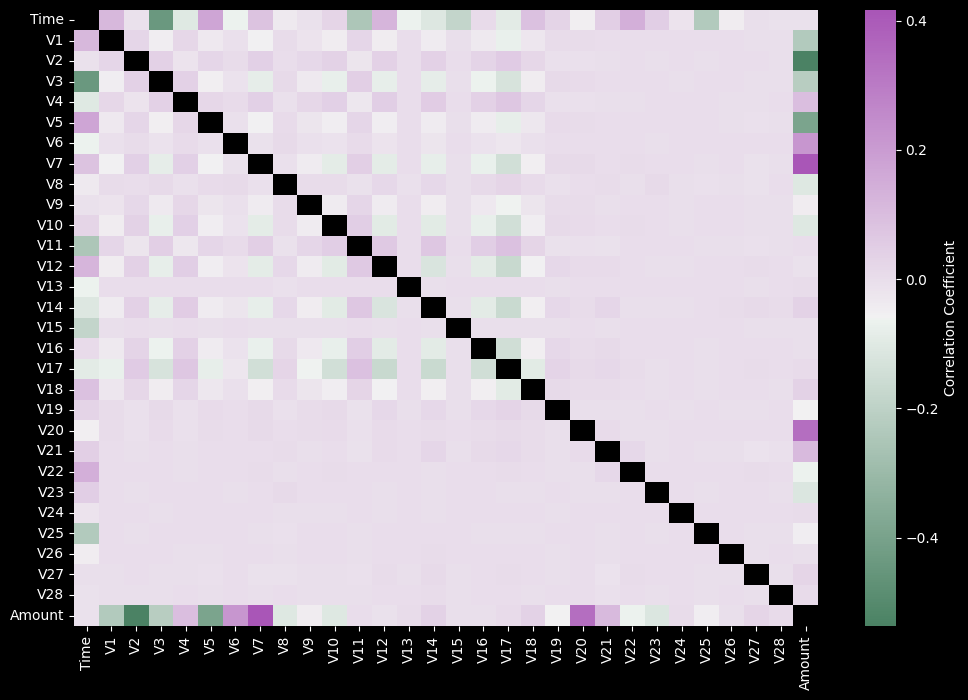

In [ ]:
mask = transactions["Class"] == 1

class_0_df = transactions[~mask].drop(columns="Class")
class_1_df = transactions[mask].drop(columns="Class")

class_0_corr = class_0_df.corr()
class_1_corr = class_1_df.corr()

diag_mask = np.eye(len(class_0_corr), dtype=bool)

plt.figure(figsize=(12, 8))

sns.heatmap(
    class_0_corr,
    mask=diag_mask,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient"},
)

<Axes: >

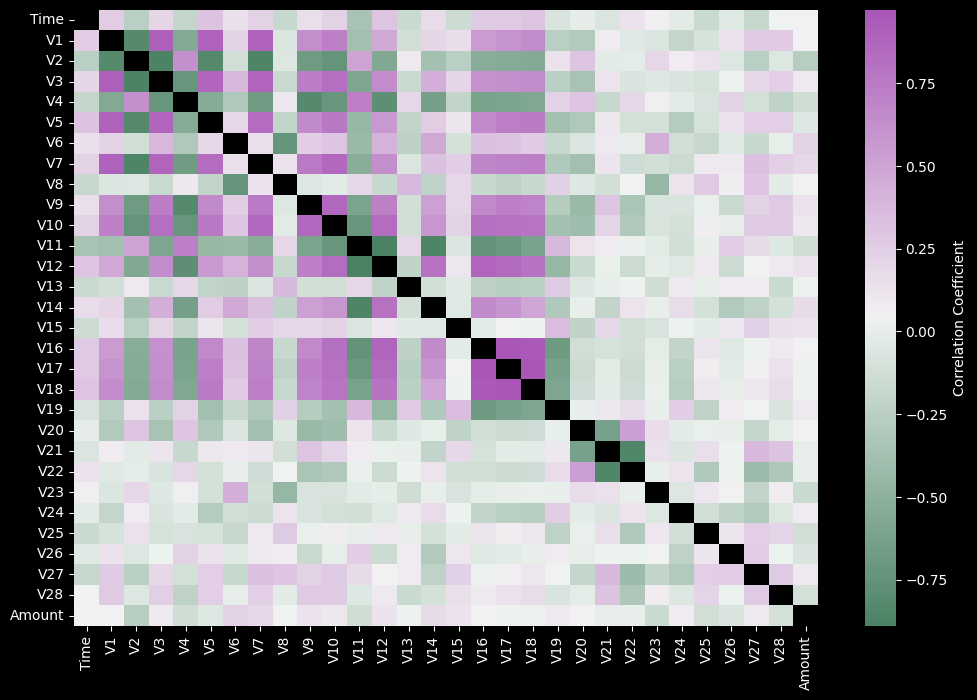

In [27]:
plt.figure(figsize=(12, 8))

sns.heatmap(
    class_1_corr,
    mask=diag_mask,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient"},
)

In [ ]:
(feats := transactions.columns.tolist()).remove("Class")

grouped_feats = tuple(itertools.batched(feats, 6))
grouped_feats

(('Time', 'V1', 'V2', 'V3', 'V4', 'V5'),
 ('V6', 'V7', 'V8', 'V9', 'V10', 'V11'),
 ('V12', 'V13', 'V14', 'V15', 'V16', 'V17'),
 ('V18', 'V19', 'V20', 'V21', 'V22', 'V23'),
 ('V24', 'V25', 'V26', 'V27', 'V28', 'Amount'))

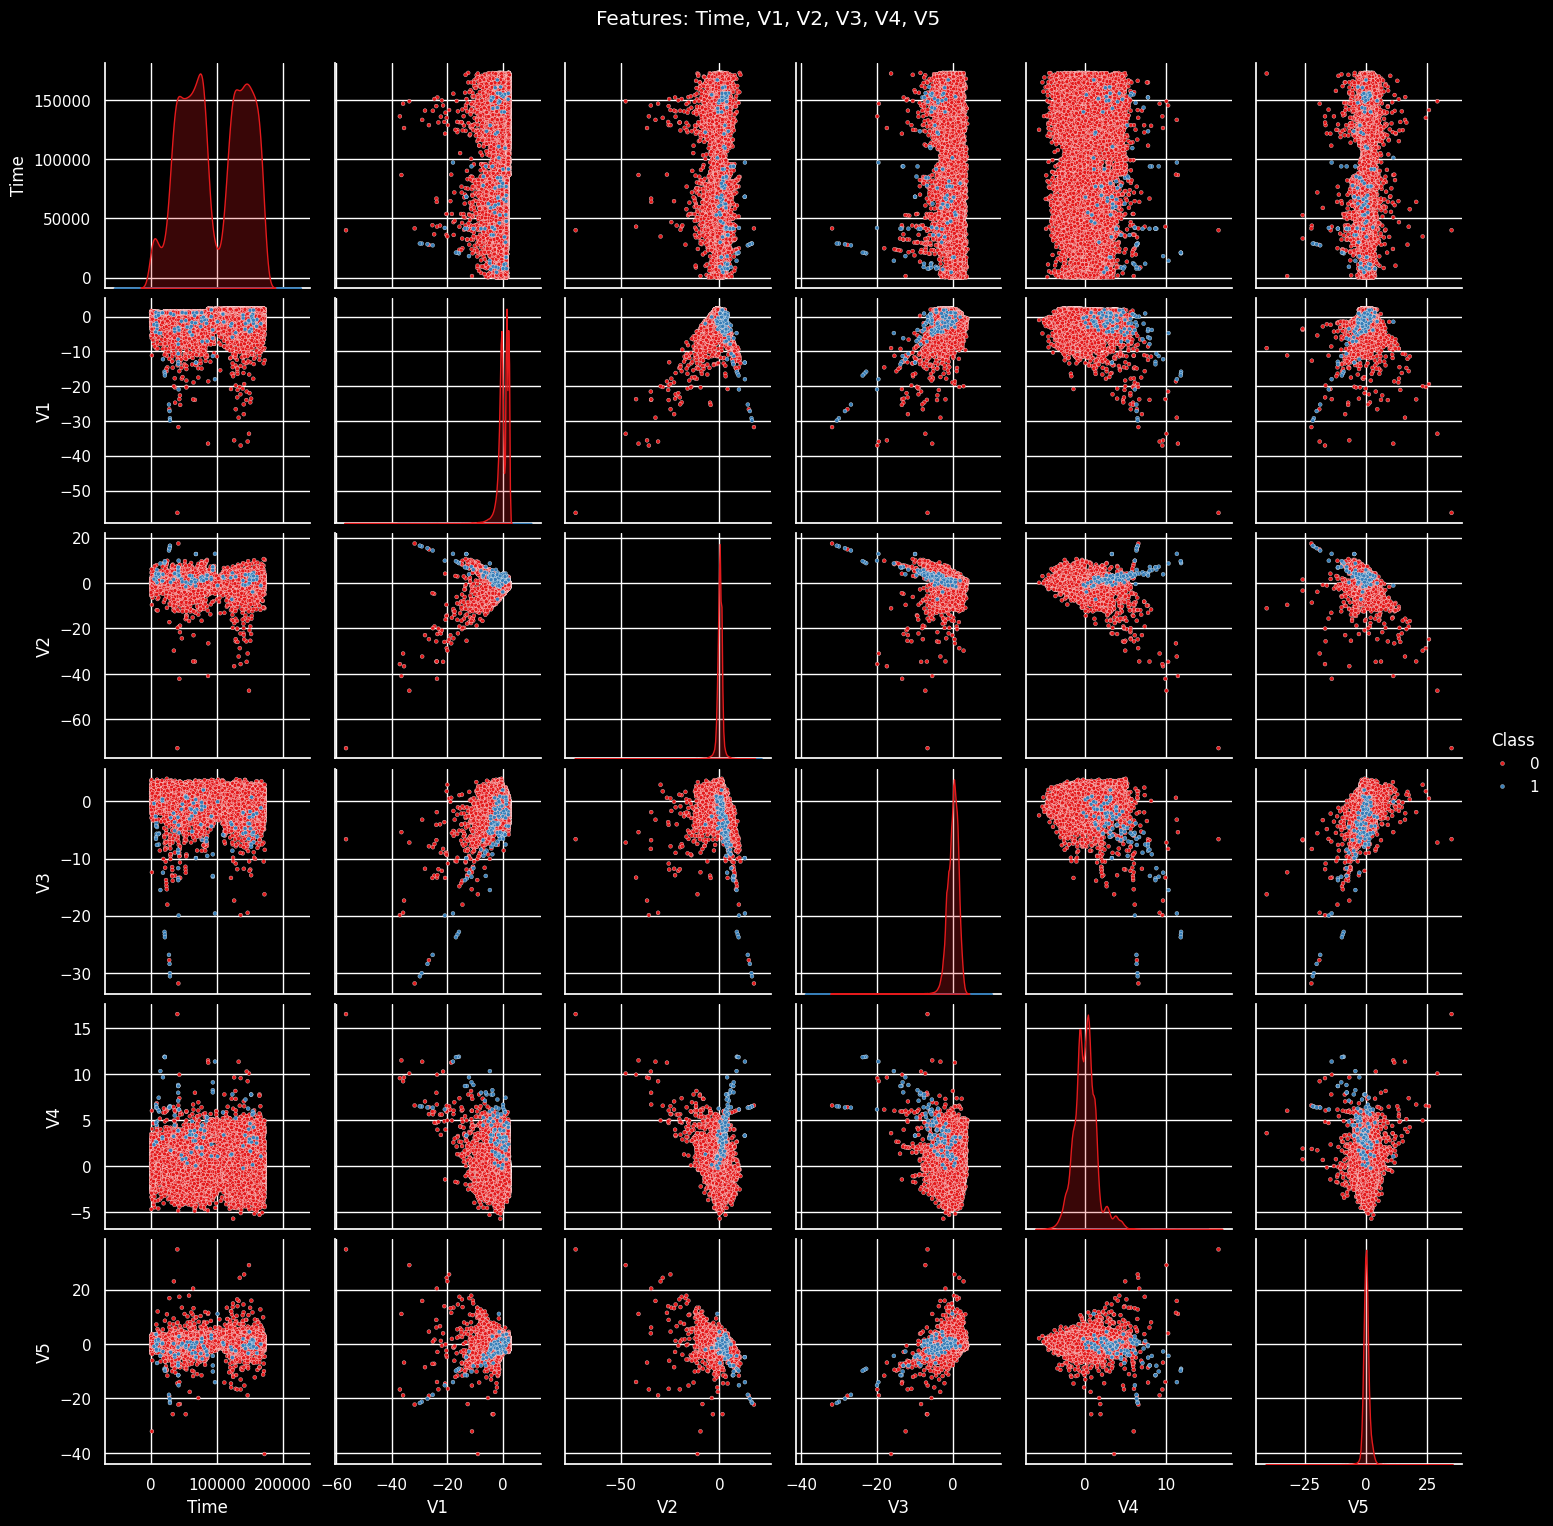

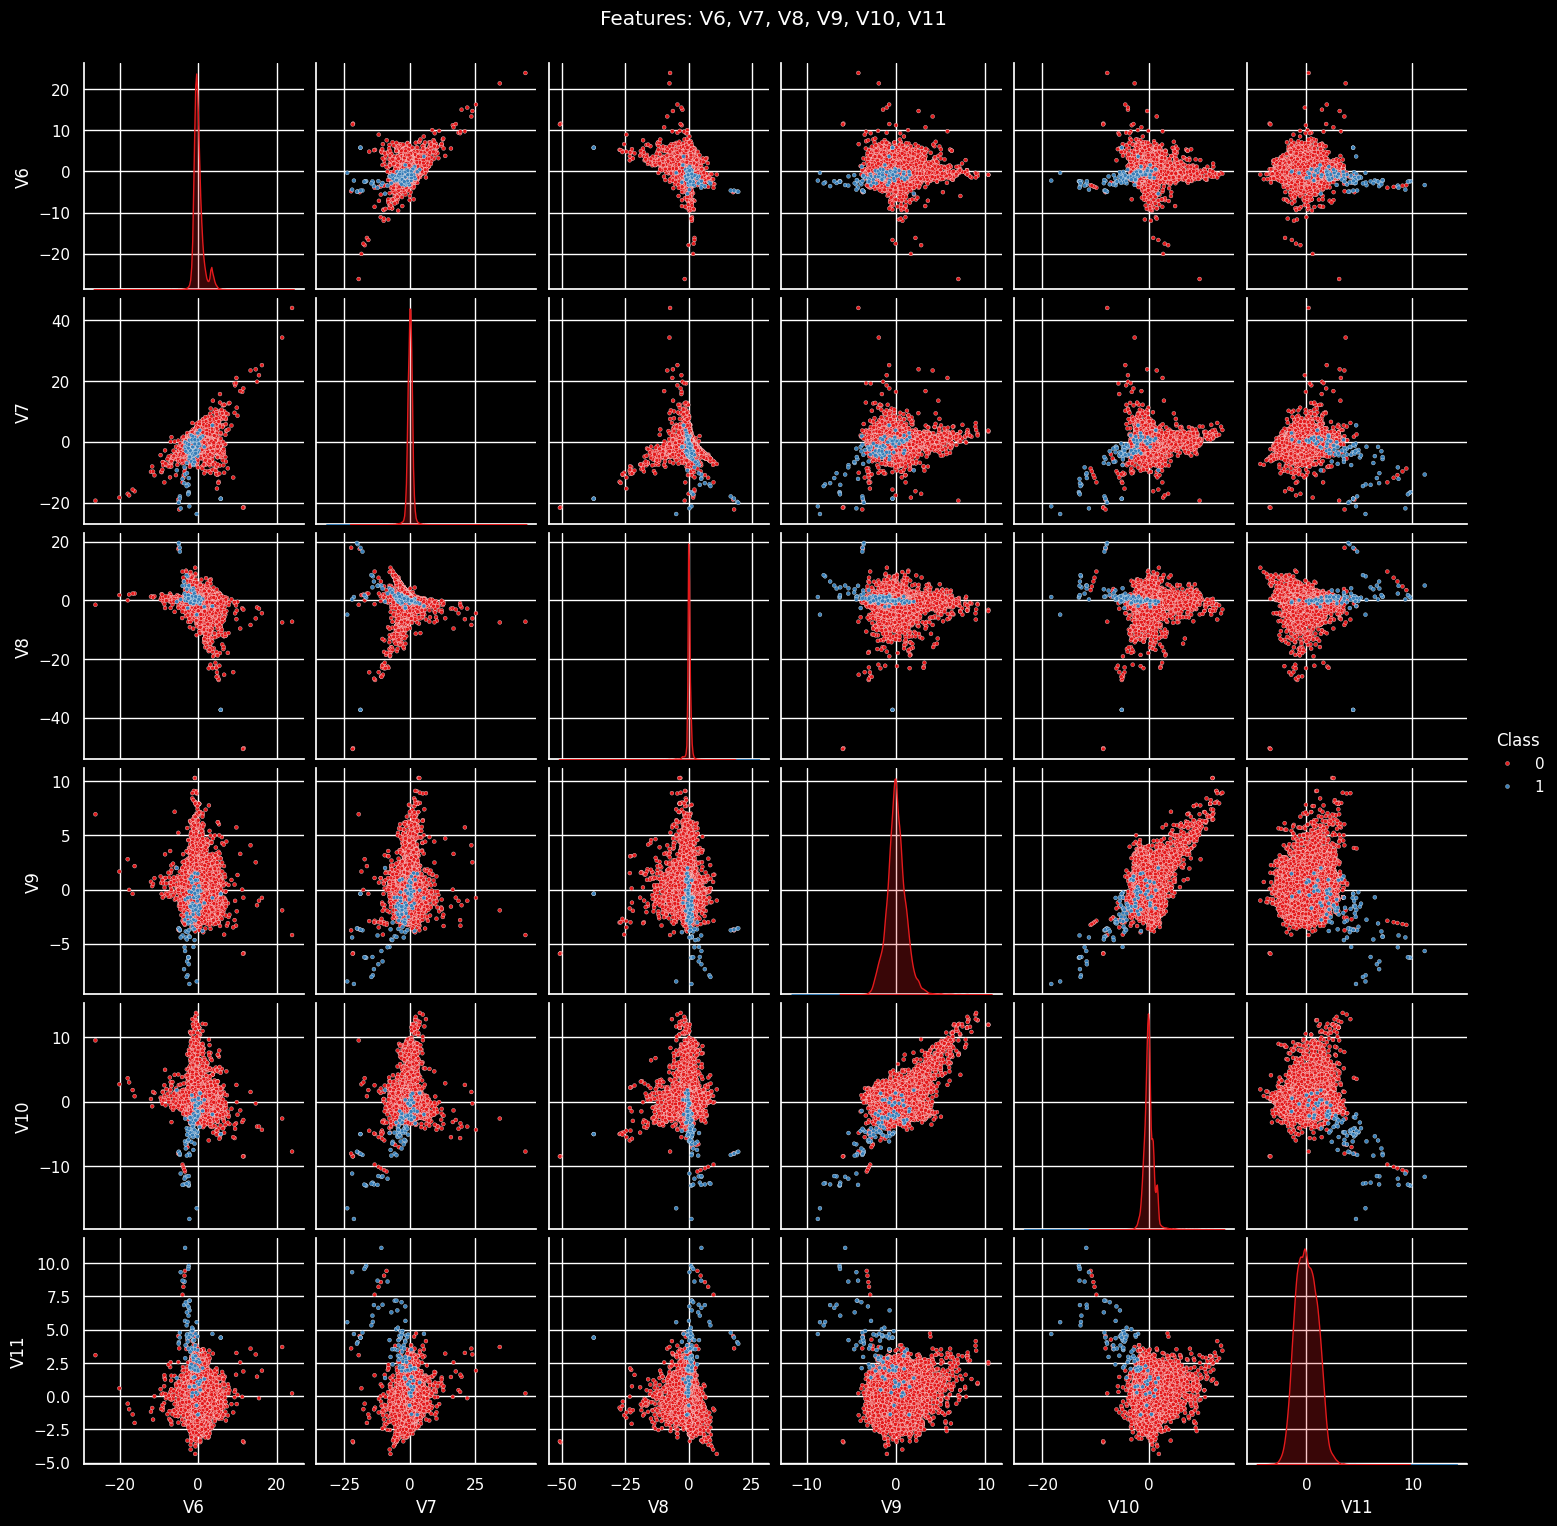

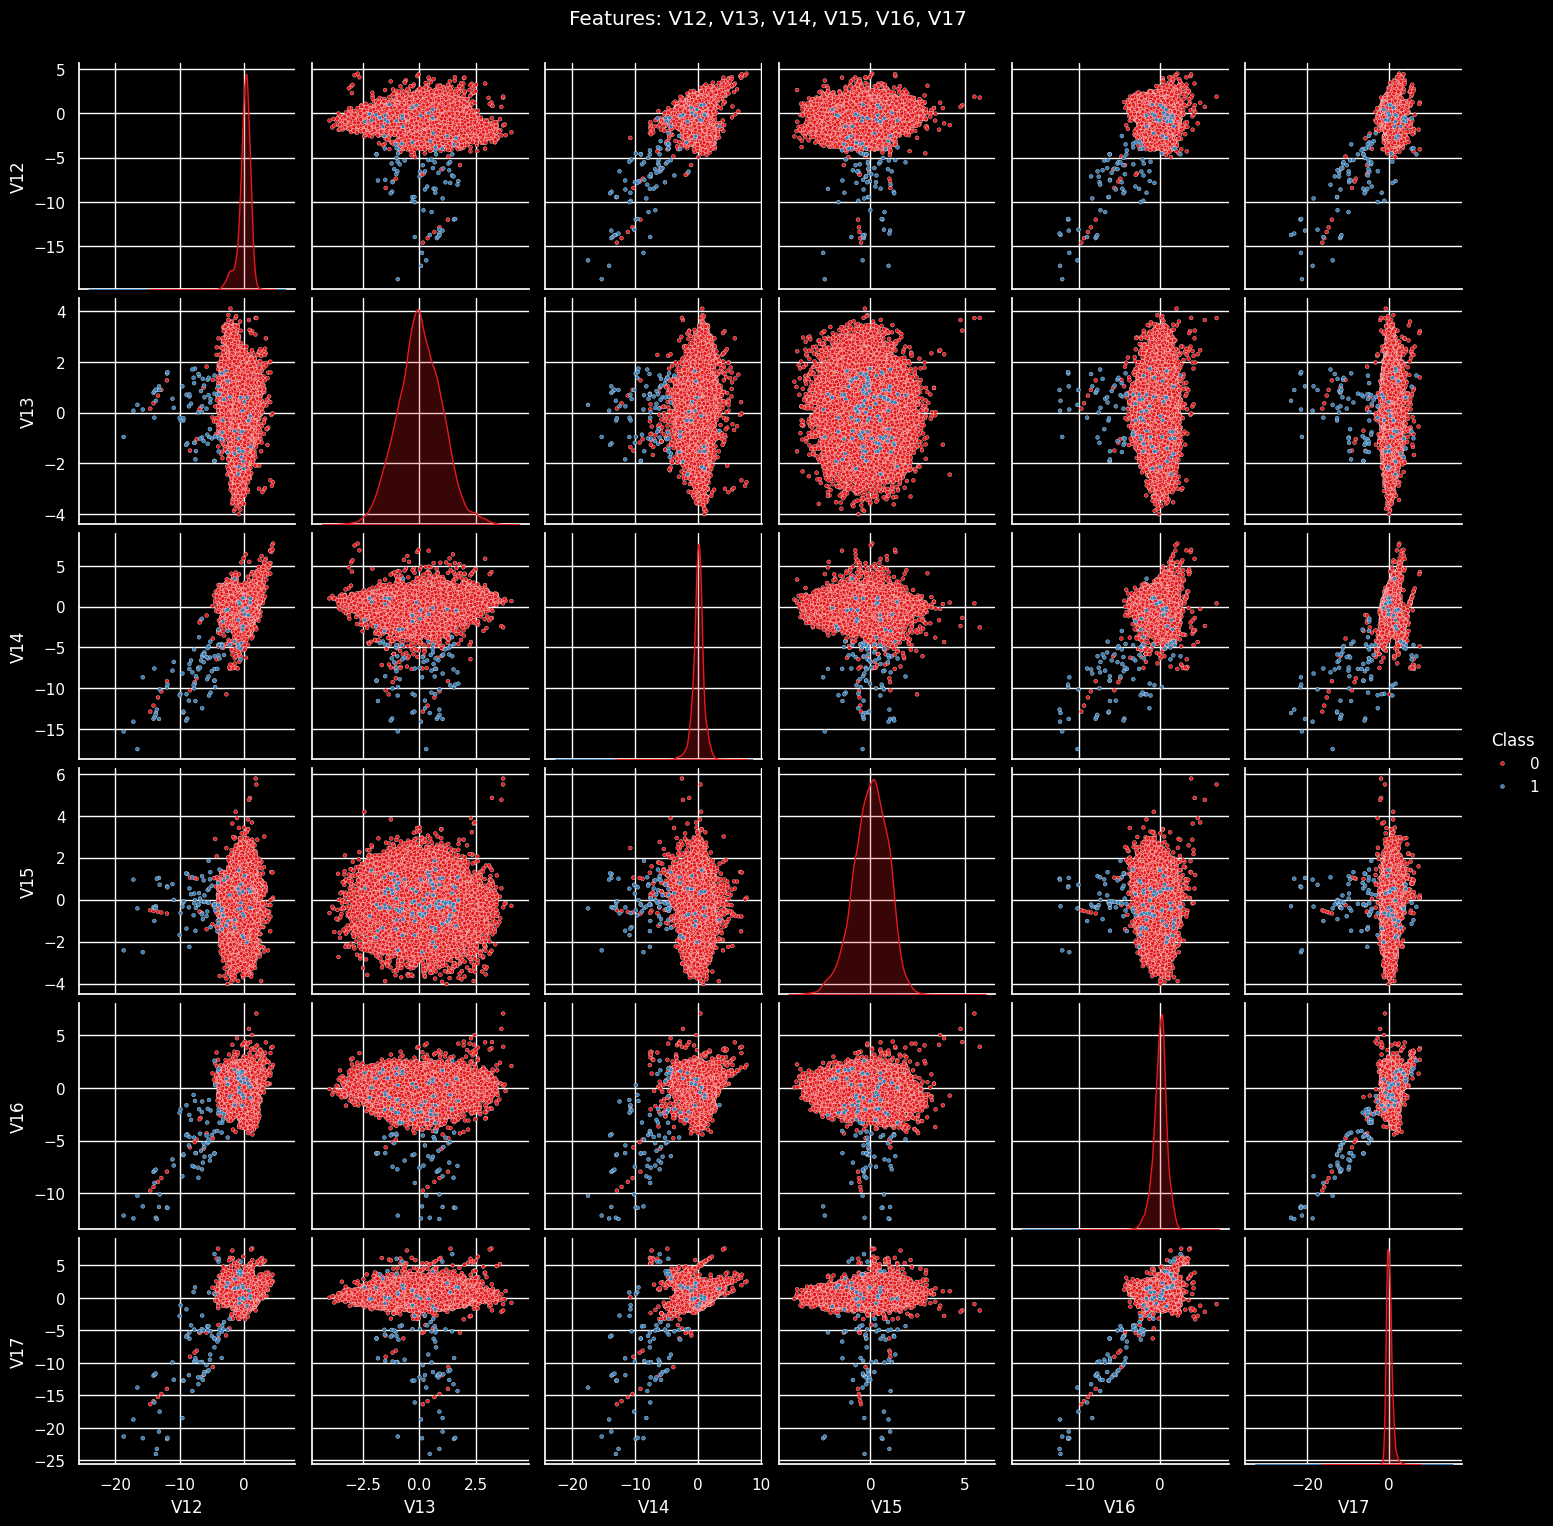

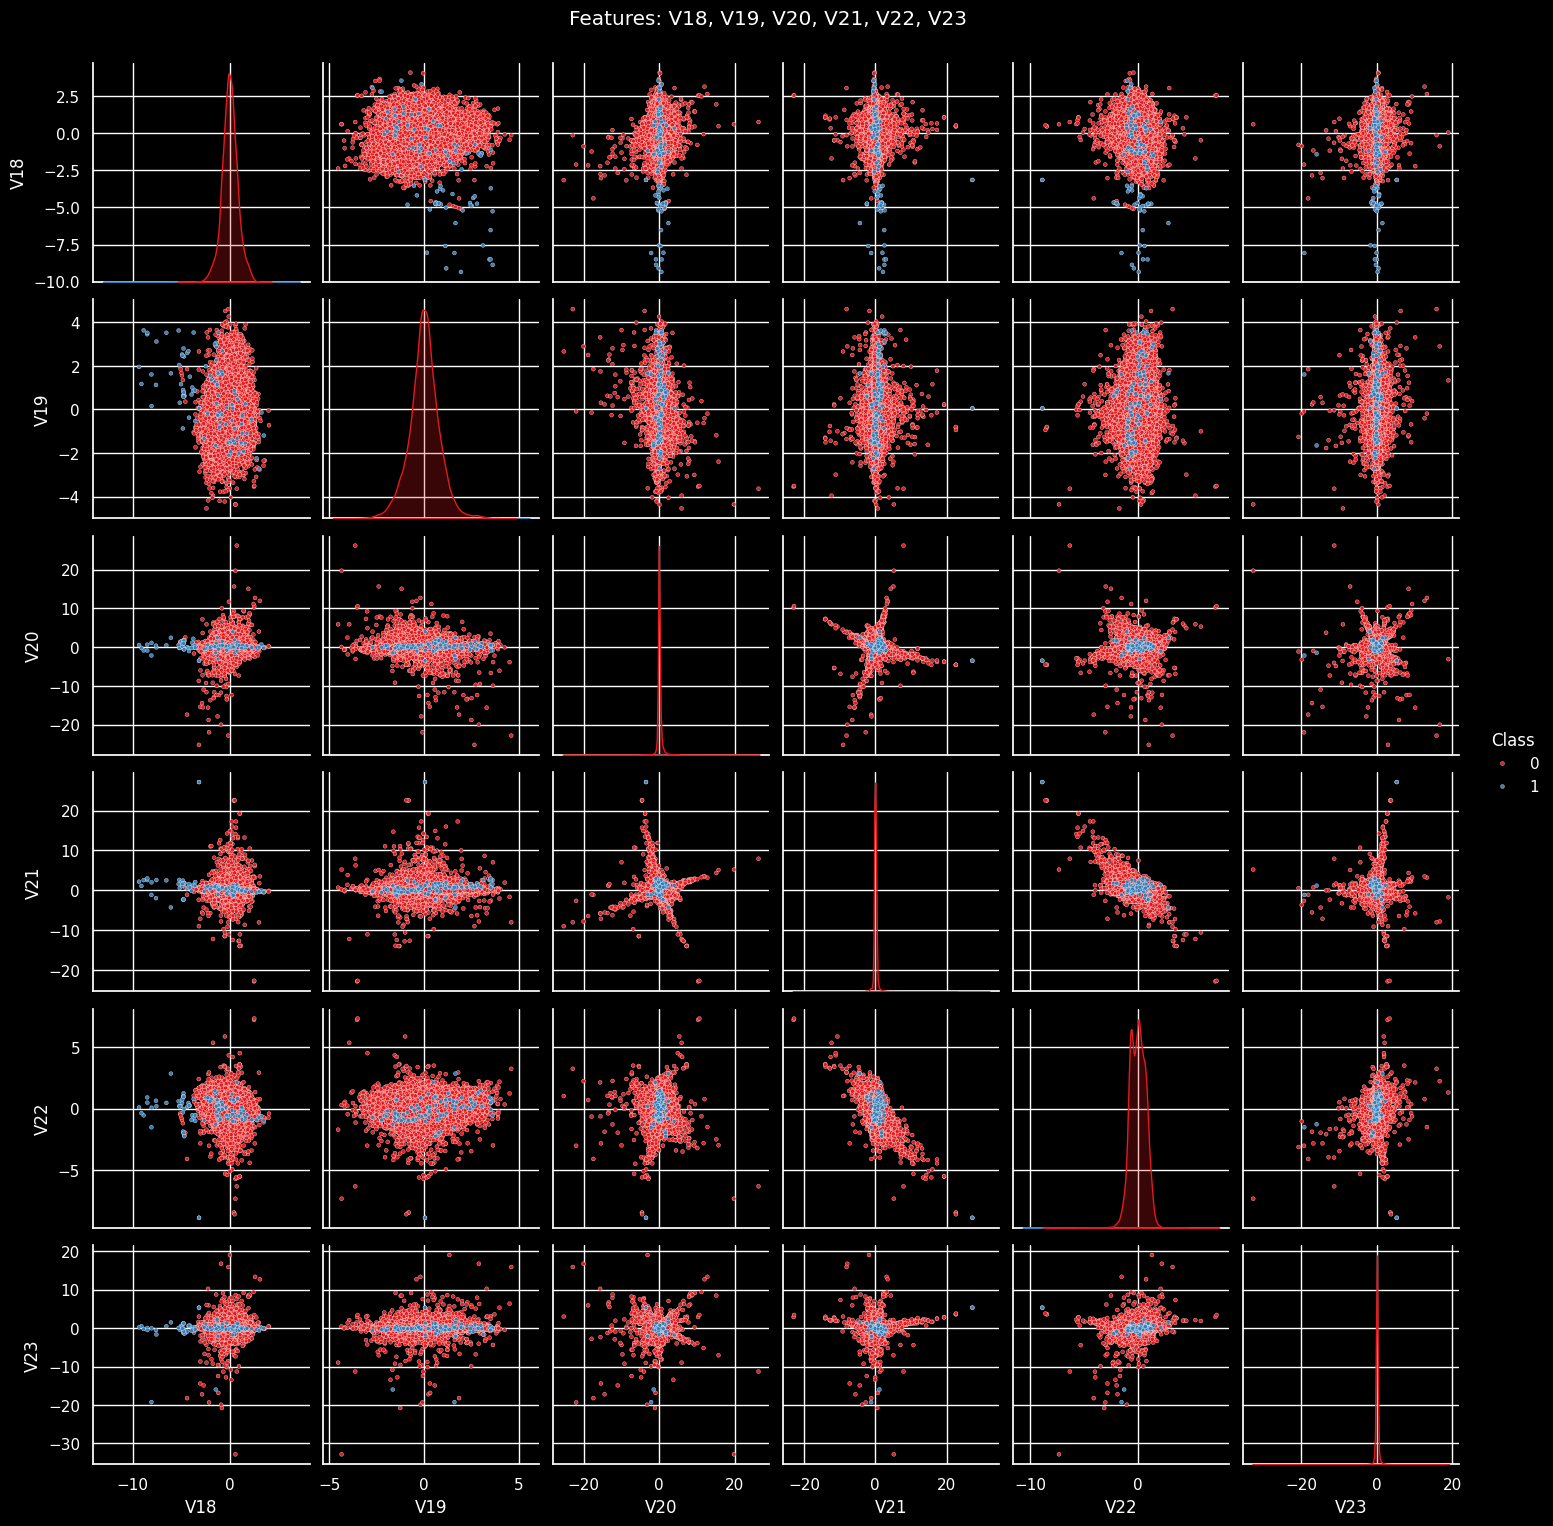

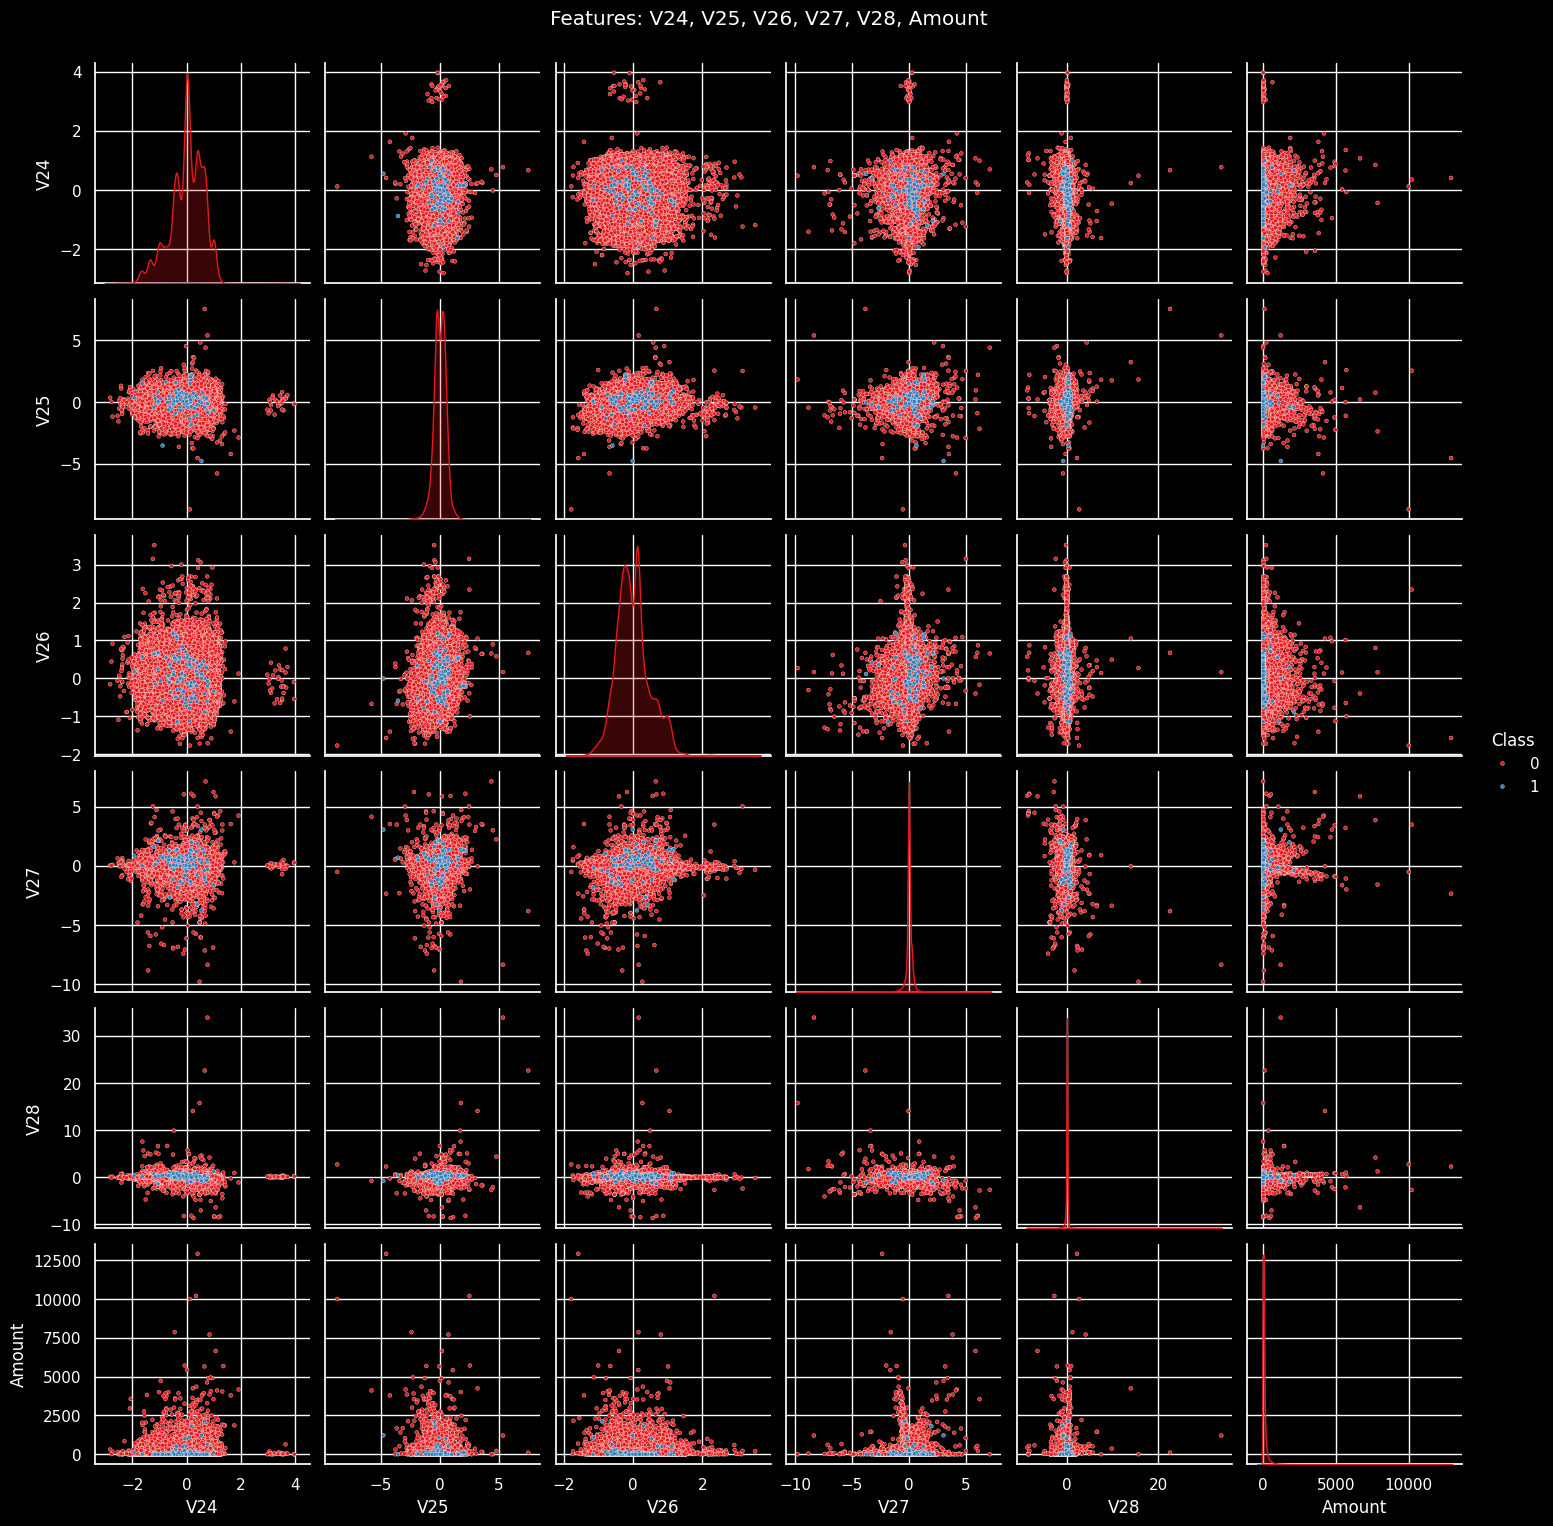

In [58]:
for group in grouped_feats:
    p = sns.pairplot(
        sampled_transactions,
        palette="Set1",
        hue="Class",
        vars=group,
        plot_kws={"alpha": 1, "s": 8},
    )
    p.figure.suptitle(f"Features: {', '.join(group)}", y=1.02)
